# Youtube comment analysis using PrimeText

In [1]:
%matplotlib inline

In [2]:
import sys
import pandas as pa
import numpy as np
from primetext import primetext
import matplotlib.pyplot as plt

from nltk.stem.lancaster import LancasterStemmer
from autocorrect import spell
st = LancasterStemmer()  

In [3]:
pt = primetext()
ytData = pa.read_csv("utubelabled.csv",encoding ='ISO-8859-1')
comments = ytData['comment']

In [4]:
comments = comments.str.replace('ï»¿','')

In [5]:
def cleanData(records,labels):
    output = []
    outputLabels = []

    recordsChecked = 0
    recordsToCheck = len(records)
    for index,sentence in enumerate(records):
        recordsChecked += 1
        sys.stdout.write("\rRecords cleaned : %i / %i" % (recordsChecked,recordsToCheck))
        cleanSentence = ''
        if len(sentence) < 200:
            words = sentence.split(' ')
            for word in words:
                if len(word) < 12:
                    if word.isalpha():
                        cleanSentence += st.stem(spell(word.lower())) + ' '
        if cleanSentence:
            output.append(cleanSentence.strip())  
            outputLabels.append(labels[index])
    sys.stdout.write("\n")
    sys.stdout.flush()
    return output,outputLabels

In [6]:
[cleanedRecords, cleanedLabels] = cleanData(comments,ytData['troll'])


Records cleaned : 3936 / 3936


In [7]:
pt.index(cleanedRecords)

Records checked : 3468
Indexed dictionary
Indexed comments


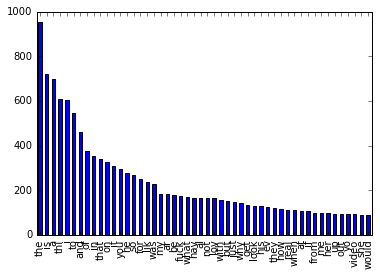

In [9]:
keyText = []
keyCount = []
for key, value in pt.indexedDictionary.items():
    c = pt.countInRecords([key])
    keyText.append(key)
    keyCount.append(c)
    
s1 = pa.Series(keyCount,index=keyText)

sortedS1  = s1.sort_values(ascending= False)[:50]

sortedS1.plot.bar()

In [10]:
df = pa.DataFrame(index=sortedS1.index, columns=sortedS1.index)
df = df.fillna(0)

In [11]:
names = sortedS1.index
colsdone = 0
for col in names:
    colsdone += 1
    sys.stdout.write("\rCols done : %i" % colsdone)
    for row in names:
        df[col][row] = pt.countInRecords([col,row])
sys.stdout.write("\n")
sys.stdout.flush()

Cols done : 50


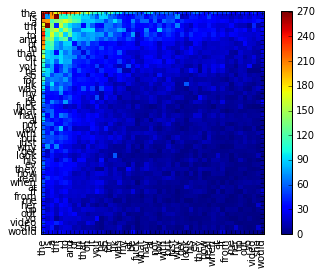

In [12]:
imgplot = plt.imshow(df,interpolation="nearest")
plt.xticks( range(len(names)), names, rotation=90 )
plt.yticks( range(len(names)), names, rotation=0 )
plt.colorbar()
plt.show()

In [14]:
myLabels = pa.Series(cleanedLabels)
myLabels.sum()

346.0

In [15]:
totalComments = myLabels.count()
totalTrollComments = myLabels.sum()
trollWeight = (totalComments-totalTrollComments)/totalComments
nonTrollWeight = totalTrollComments/totalComments

trollWeight, nonTrollWeight

(0.90020190366310937, 0.099798096336890685)

In [16]:
# for each troll comment add the troll weight to each word
# for each non troll comment minus the nonTrollWeight from each word

In [17]:
len(pt.cleanedDictionary)

3158

In [18]:
totalFoundTrolling = myLabels[pt.find(['the'])].sum()
totalFoundTrolling

61.0

In [19]:
totalFoundNotTrolling = pt.find(['the']).sum() - totalFoundTrolling
totalFoundNotTrolling

895.0

In [20]:
trollScore = (totalFoundTrolling * trollWeight) - (totalFoundNotTrolling * nonTrollWeight)
trollScore

-34.406980098067493

In [21]:
trollScores = []
for word in pt.cleanedDictionary:
    totalFoundTrolling = myLabels[pt.find([word])].sum()
    totalFoundNotTrolling = pt.find([word]).sum() - totalFoundTrolling
    trollScore = (totalFoundTrolling * trollWeight) - (totalFoundNotTrolling * nonTrollWeight)
    trollScores.append(trollScore)


the        -34.406980
i          -22.377848
to         -17.389963
it         -13.837612
lov        -12.366888
for        -12.248918
but        -12.069513
and        -11.206519
not         -9.466686
was         -7.753966
real        -7.376983
al          -6.566484
cut         -6.287280
so          -5.945486
know        -5.884050
on          -5.733776
happy       -5.688491
good        -5.684453
get         -5.572541
my          -5.562446
jam         -5.387078
when        -5.277185
do          -4.786271
he          -4.743871
best        -4.690511
in          -4.328526
pap         -4.191520
wil         -4.083646
me          -3.880012
we          -3.782232
too         -3.692530
with        -3.668301
out         -3.580617
hav         -3.566484
got         -3.486876
about       -3.482838
ov          -3.393135
birthday    -3.393135
thought     -3.293337
song        -3.291318
am          -3.289299
mor         -3.287280
video       -3.281223
old         -3.193539
thank       -3.189501
run       

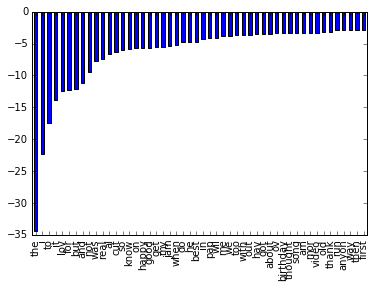

In [29]:
s2 = pa.Series(trollScores,index= pt.cleanedDictionary)

sortedS2  = s2.sort_values(ascending= True)[:50]

sortedS2.plot.bar()
print(sortedS2)

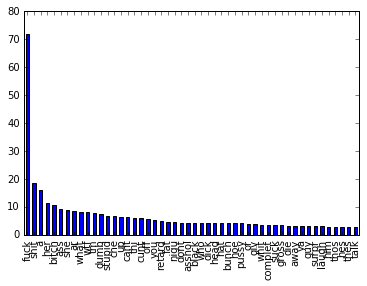

In [24]:
s2 = pa.Series(trollScores,index= pt.cleanedDictionary)

sortedS2  = s2.sort_values(ascending= False)[:50]

sortedS2.plot.bar()